In [11]:
#Importing libarary that I am using in this project
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


###### Data collection and processing

In [12]:
dataset=pd.read_csv('gld_price_data.csv')

In [13]:
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [14]:
dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


SPX=the Standard & Poor's 500 Index , GLD=Gold price, USO=US oil price , SLV=silver price 

In [18]:
# Shape of dataset
dataset.shape

(2290, 6)

Total data of 10 years.

In [7]:
dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [19]:
#getting statstical measures of the data
dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation between various column of the dataset

1-Positive correlation : positive correlation describes the relationship between two variables that change together.

2-Negatiove correlation : inverse correlation describes the relationship between two variables which change in opposing directions. Inverse correlation is sometimes described as negative correlation.

In [20]:
correlation=dataset.corr()

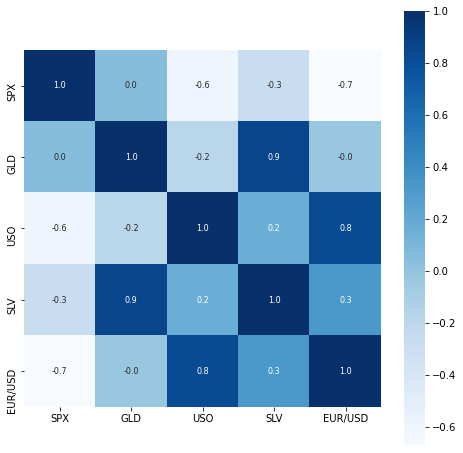

In [25]:
# constructing the heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [26]:
#correllation of GLD

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


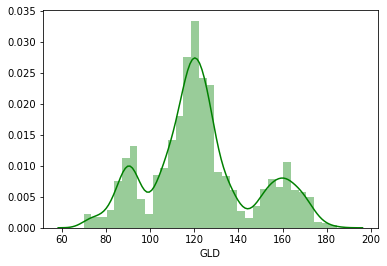

In [29]:
# checking the distribution of the GLD price 
sns.distplot(dataset['GLD'],color='green')

###### Splitting the features and target data


In [32]:
X=dataset.drop(['Date','GLD'],axis=1)
Y=dataset['GLD']

In [33]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [34]:
#spliting traing and test data

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

##### Model training  : Random Forest Regressor

In [35]:
regressor=RandomForestRegressor(n_estimators=100)

In [36]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [37]:
# Model evaluation

test_data_prediction=regressor.predict(X_test)

In [38]:
print(test_data_prediction)

[126.97519889 116.7920994  139.62800124 121.84810026  94.19250028
 155.29040076 117.7532014  113.34940133 153.42520059 105.6571012
 103.21389854 119.84090077  92.33199908 158.98260202 121.55099859
 117.40460097  86.72629844  92.01019943  93.01759994 125.72459986
  83.55529935 117.61949894 126.46919814 173.43779736 169.46769746
 139.87640279 114.29679953 159.88760191 134.02330041 115.7742003
 111.09630089 104.67610167 128.37390098 122.12949986  98.85579989
 120.11209957  84.33410031 115.07639993 127.372499   139.99089923
 107.60020069 131.55750071 107.98909947 135.37940021 133.89509907
 149.20099892 119.70353869 157.00670064 156.45700103 127.59789951
 123.46210001 115.5698984  123.95190094 118.92229981 153.73580029
 121.44719945 112.44050032  86.94829963 155.40430028 117.80090128
  87.95819883 114.67370021  83.32279945 146.55809786 125.33570028
 127.37329768 125.1497992  121.03819984 168.23940174 121.71609911
 125.68390182 173.32189777 121.65020111 169.53790143 119.16970046
 127.0985996

In [39]:
# for compare between actual value with predicted value: R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)

In [40]:
print("R-squared error",error_score)

R-squared error 0.9897484715529399


In [42]:
# compare actual value and predicted with plot
Y_test=list(Y_test)

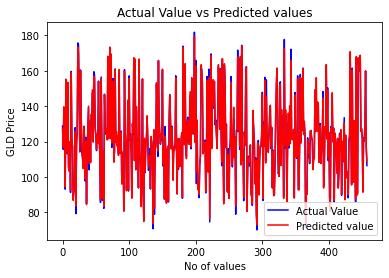

In [45]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='red',label='Predicted value')
plt.title('Actual Value vs Predicted values')
plt.xlabel("No of values")
plt.ylabel('GLD Price')
plt.legend()
plt.show()